# Extended Two Moons Dataset

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from mislabeled.datasets.toy import (
    moons,
    ground_truth_px,
    ground_truth_pyx,
)
import tempfile


/var/folders/65/rv76bdzx3sv0m6rwzx__cds40000gn/T/ipykernel_30555/3612459730.py:72: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f.show()
/var/folders/65/rv76bdzx3sv0m6rwzx__cds40000gn/T/ipykernel_30555/3612459730.py:72: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f.show()
/var/folders/65/rv76bdzx3sv0m6rwzx__cds40000gn/T/ipykernel_30555/3612459730.py:72: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f.show()
/var/folders/65/rv76bdzx3sv0m6rwzx__cds40000gn/T/ipykernel_30555/3612459730.py:72: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f.show()
/var/folders/65/rv76bdzx3sv0m6rwzx__cds40000gn/T/ipykernel_30555/3612459730.py:72: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f.show()
/var/folders/65/rv76bdzx3sv0m6rwzx__cds40000gn/T/ipykernel_30555/3612459730.py:72: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f

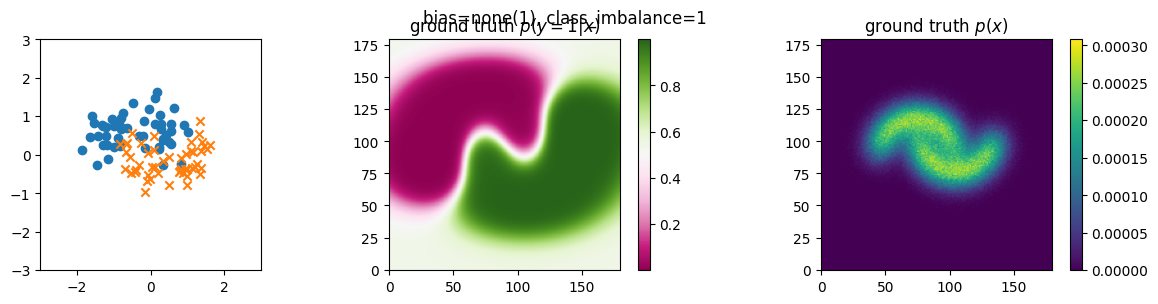

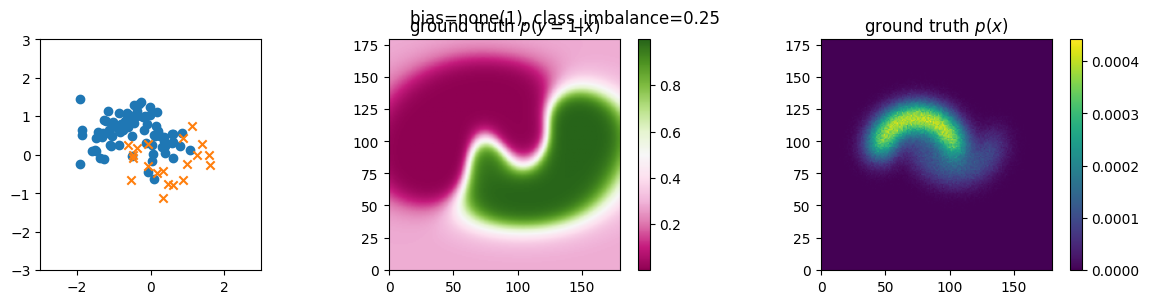

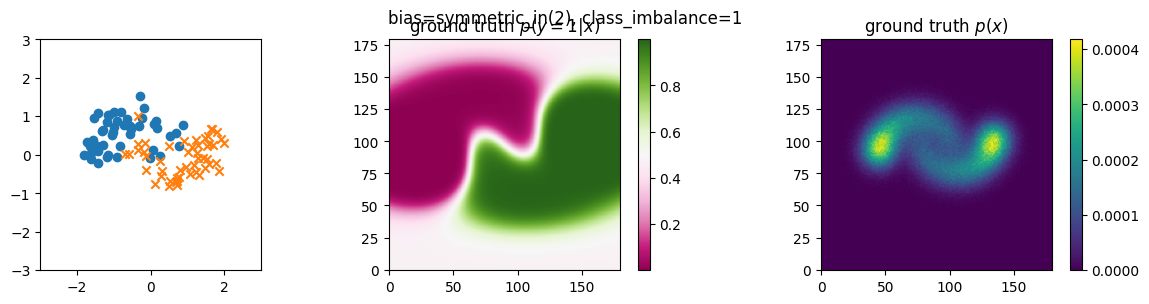

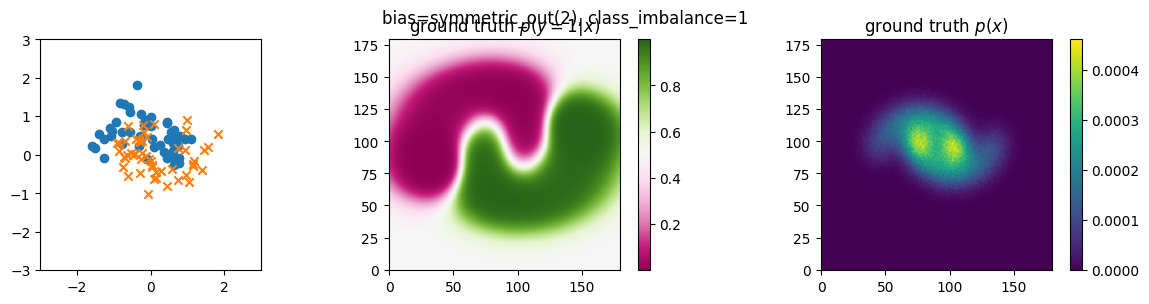

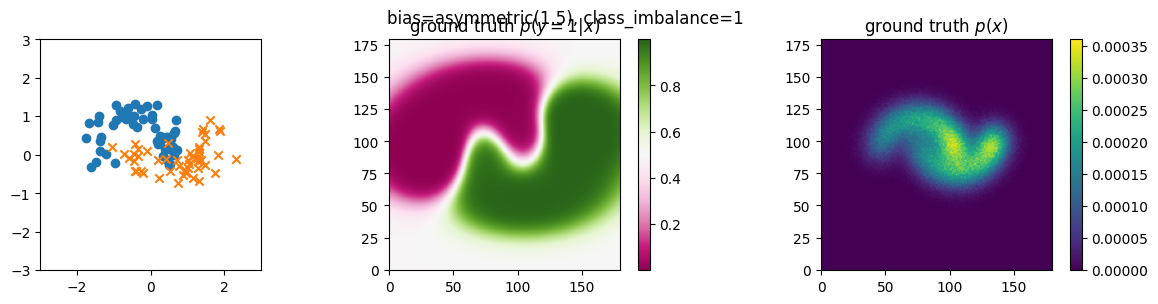

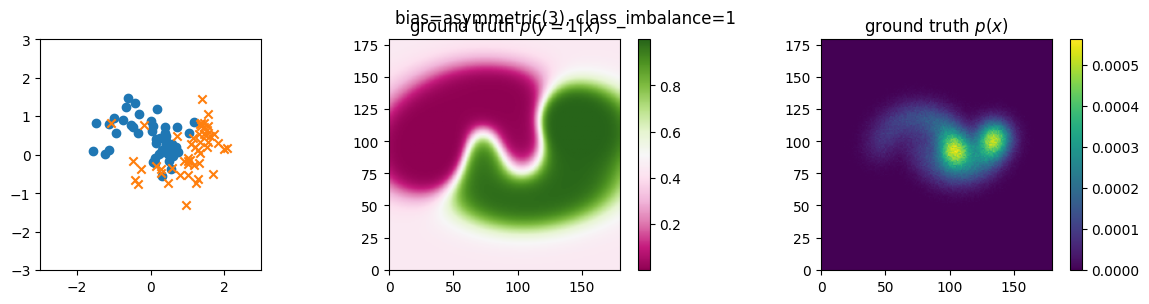

In [7]:
spread = 0.3


x_min, x_max = -3, 3
y_min, y_max = -3, 3
x_edges = np.linspace(x_min, x_max, 181)
y_edges = np.linspace(y_min, y_max, 181)

x_coords = (x_edges[1:] + x_edges[:-1]) / 2
y_coords = (y_edges[1:] + y_edges[:-1]) / 2

xy = np.stack(np.meshgrid(x_coords, y_coords, indexing="ij"), axis=-1)

for bias, class_imbalance, bias_strenght in [
    ("none", 1, 1),
    ("none", 0.25, 1),
    ("symmetric_in", 1, 2),
    ("symmetric_out", 1, 2),
    ("asymmetric", 1, 1.5),
    ("asymmetric", 1, 3),
]:
    f, axes = plt.subplots(1, 3, width_ratios=[3, 5, 5], figsize=(14, 3))
    f.suptitle(f"bias={bias}({bias_strenght}), class_imbalance={class_imbalance}")

    X, y = moons(
        n_examples=100,
        spread=spread,
        bias=bias,
        bias_strenght=bias_strenght,
        class_imbalance=class_imbalance,
    )

    axis = axes[0]
    axis.scatter(X[y == 0, 0], X[y == 0, 1], marker="o")
    axis.scatter(X[y == 1, 0], X[y == 1, 1], marker="x")
    axis.set_xlim(x_min, x_max)
    axis.set_ylim(y_min, y_max)


    with tempfile.TemporaryDirectory() as temp_dir:
        p_y_x = ground_truth_pyx(
            moons,
            xy.reshape(-1, 2),
            spread=spread,
            bias=bias,
            bias_strenght=bias_strenght,
            class_imbalance=class_imbalance,
            dataset_cache_path=temp_dir,
        )

    axis = axes[1]
    axis.set_title("ground truth $p(y=1|x)$")
    im = axis.imshow(p_y_x.reshape(180, 180).T, origin="lower", cmap="PiYG")
    f.colorbar(im, ax=axis)

    with tempfile.TemporaryDirectory() as temp_dir:
        p_x = ground_truth_px(
            moons,
            xy.reshape(-1, 2),
            spread=spread,
            bias=bias,
            bias_strenght=bias_strenght,
            class_imbalance=class_imbalance,
            dataset_cache_path=temp_dir,
        )

    axis = axes[2]
    axis.set_title("ground truth $p(x)$")
    im = axis.imshow(p_x.reshape(180, 180).T, origin="lower")
    f.colorbar(im, ax=axis)

    f.show()

/var/folders/65/rv76bdzx3sv0m6rwzx__cds40000gn/T/ipykernel_30555/1953411556.py:69: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f.show()
/var/folders/65/rv76bdzx3sv0m6rwzx__cds40000gn/T/ipykernel_30555/1953411556.py:69: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f.show()
/var/folders/65/rv76bdzx3sv0m6rwzx__cds40000gn/T/ipykernel_30555/1953411556.py:69: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f.show()
/var/folders/65/rv76bdzx3sv0m6rwzx__cds40000gn/T/ipykernel_30555/1953411556.py:69: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f.show()


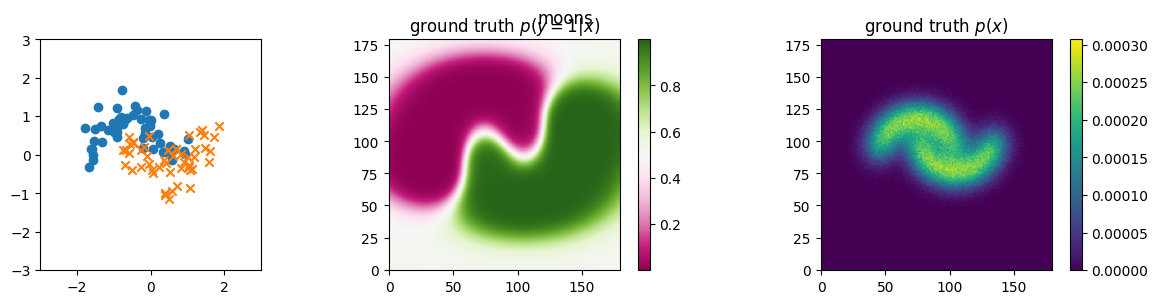

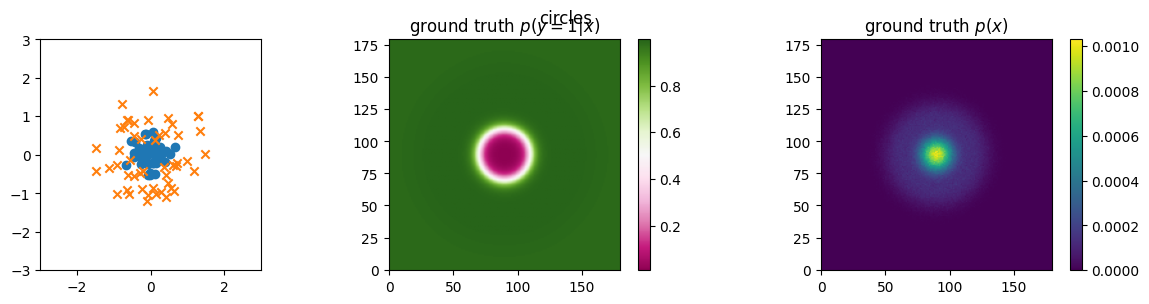

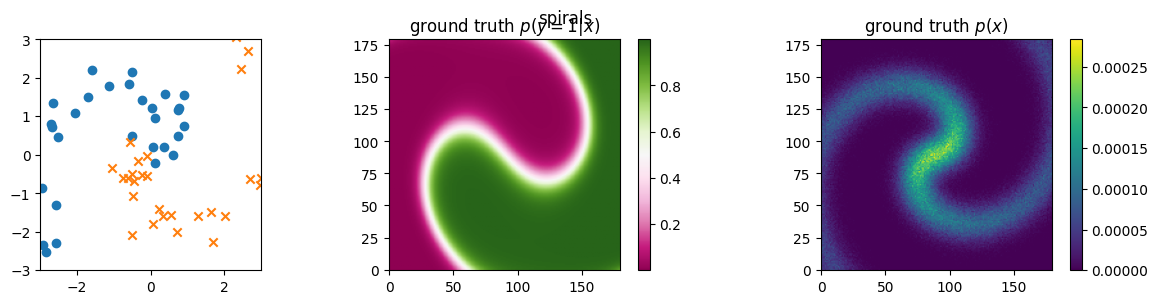

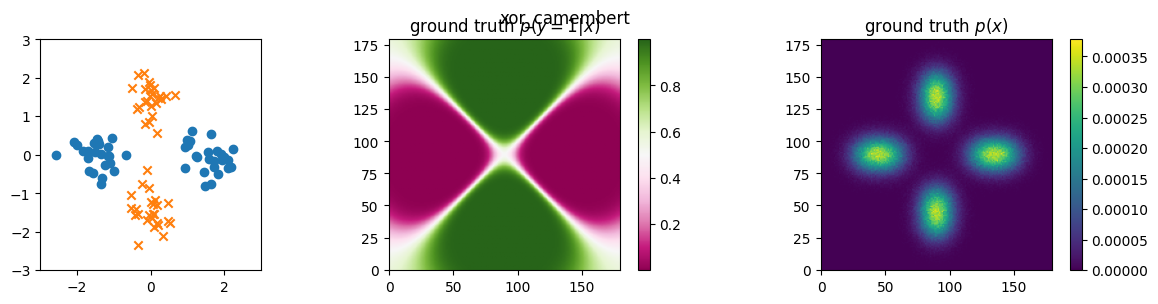

In [9]:
from mislabeled.datasets.toy import moons, circles, spirals, xor_camembert
import matplotlib.pyplot as plt
import numpy as np

from mislabeled.datasets.toy import (
    moons,
    ground_truth_px,
    ground_truth_pyx,
)

import tempfile


spread = 0.3

x_min, x_max = -3, 3
y_min, y_max = -3, 3
x_edges = np.linspace(x_min, x_max, 181)
y_edges = np.linspace(y_min, y_max, 181)

x_coords = (x_edges[1:] + x_edges[:-1]) / 2
y_coords = (y_edges[1:] + y_edges[:-1]) / 2

xy = np.stack(np.meshgrid(x_coords, y_coords, indexing="ij"), axis=-1)

for dataset in [moons, circles, spirals, xor_camembert
]:
    f, axes = plt.subplots(1, 3, width_ratios=[3, 5, 5], figsize=(14, 3))
    f.suptitle(f"{dataset.__name__}")

    X, y = dataset(
        n_examples=100,
        spread=spread
    )

    axis = axes[0]
    axis.scatter(X[y == 0, 0], X[y == 0, 1], marker="o")
    axis.scatter(X[y == 1, 0], X[y == 1, 1], marker="x")
    axis.set_xlim(x_min, x_max)
    axis.set_ylim(y_min, y_max)

    with tempfile.TemporaryDirectory() as temp_dir:
        p_y_x = ground_truth_pyx(
            dataset,
            xy.reshape(-1, 2),
            spread=spread,
            dataset_cache_path=temp_dir
        )

    axis = axes[1]
    axis.set_title("ground truth $p(y=1|x)$")
    im = axis.imshow(p_y_x.reshape(180, 180).T, origin="lower", cmap="PiYG")
    f.colorbar(im, ax=axis)

    with tempfile.TemporaryDirectory() as temp_dir:
        p_x = ground_truth_px(
            dataset,
            xy.reshape(-1, 2),
            spread=spread,
            dataset_cache_path=temp_dir
        )


    axis = axes[2]
    axis.set_title("ground truth $p(x)$")
    im = axis.imshow(p_x.reshape(180, 180).T, origin="lower")
    f.colorbar(im, ax=axis)

    f.show()